In [ ]:
!pip install missingno

from google.colab import files
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
uploaded = files.upload()

Saving OSA_DB_UPM.xlsx to OSA_DB_UPM.xlsx


In [ ]:
# Specify the file name
file_name = 'OSA_DB_UPM.xlsx'

# Read the Excel file into a DataFrame
df_tmp = pd.read_excel(file_name)
df_tmp.head(20)

,IAH,Weight,Height,Age,PerCervical,Gender
0,29.6,119,174,56,48.0,hombre
1,19.7,78,168,39,42.0,hombre
2,9.0,80,173,32,40.0,hombre
3,2.0,109,190,32,42.0,hombre
4,34.0,86,169,39,42.0,hombre
5,60.0,145,172,47,44.0,hombre
6,22.0,72,165,40,42.0,hombre
7,11.0,80,180,28,38.0,hombre
8,3.7,90,180,36,40.0,hombre
9,7.0,50,158,50,35.0,mujer


### Visualization

Define the gender as a factor, as there is unbalance between the IAH of the man and the women

In [ ]:
df_tmp['Gender'] = df_tmp['Gender'].astype('category')

In [ ]:
df_tmp['Gender'] = df_tmp['Gender'].map({'hombre': 0, 'mujer': 1})
df_tmp['Gender'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Gender, dtype: category
Categories (2, int64): [0, 1]

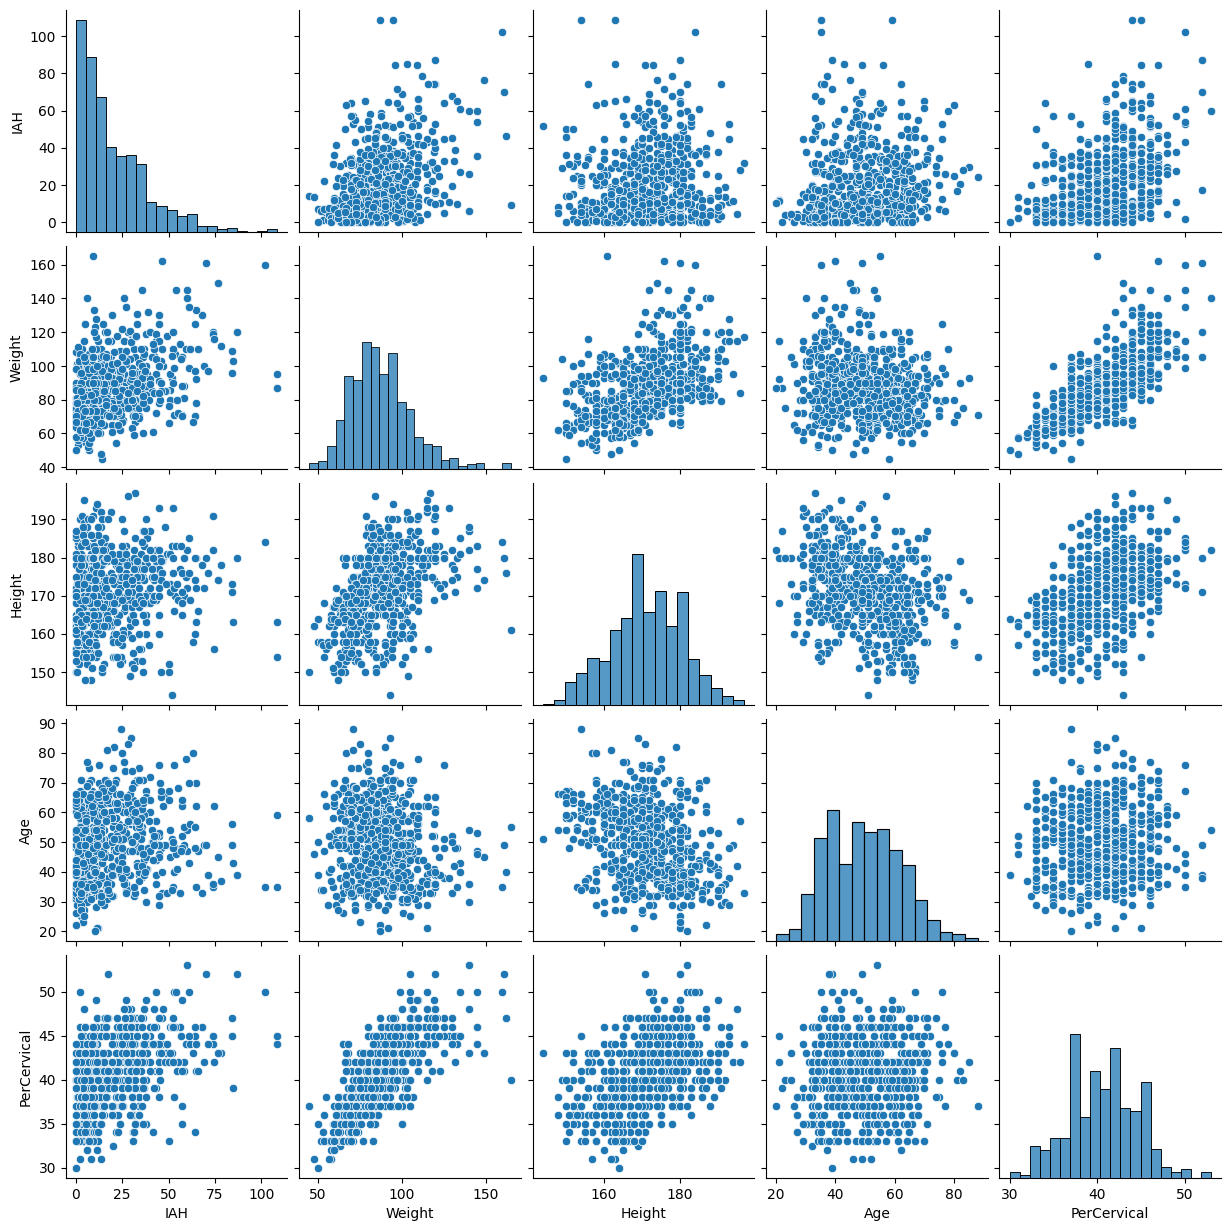

In [ ]:
sns.pairplot(df_tmp)

<ipython-input-107-739cce27675d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_tmp.corr()


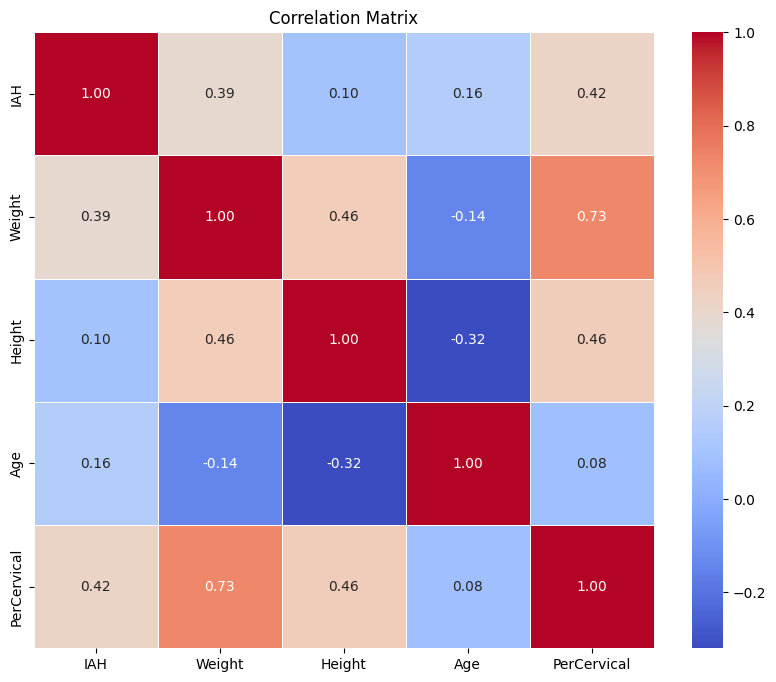

In [ ]:
correlation_matrix = df_tmp.corr()

# Create a heatmap for the graphical representation
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

### Feature engeneering

a "new" feature **BMI** could be interesting

In [ ]:
df_tmp['BMI'] = df_tmp['Weight']/(df_tmp['Height']**2)

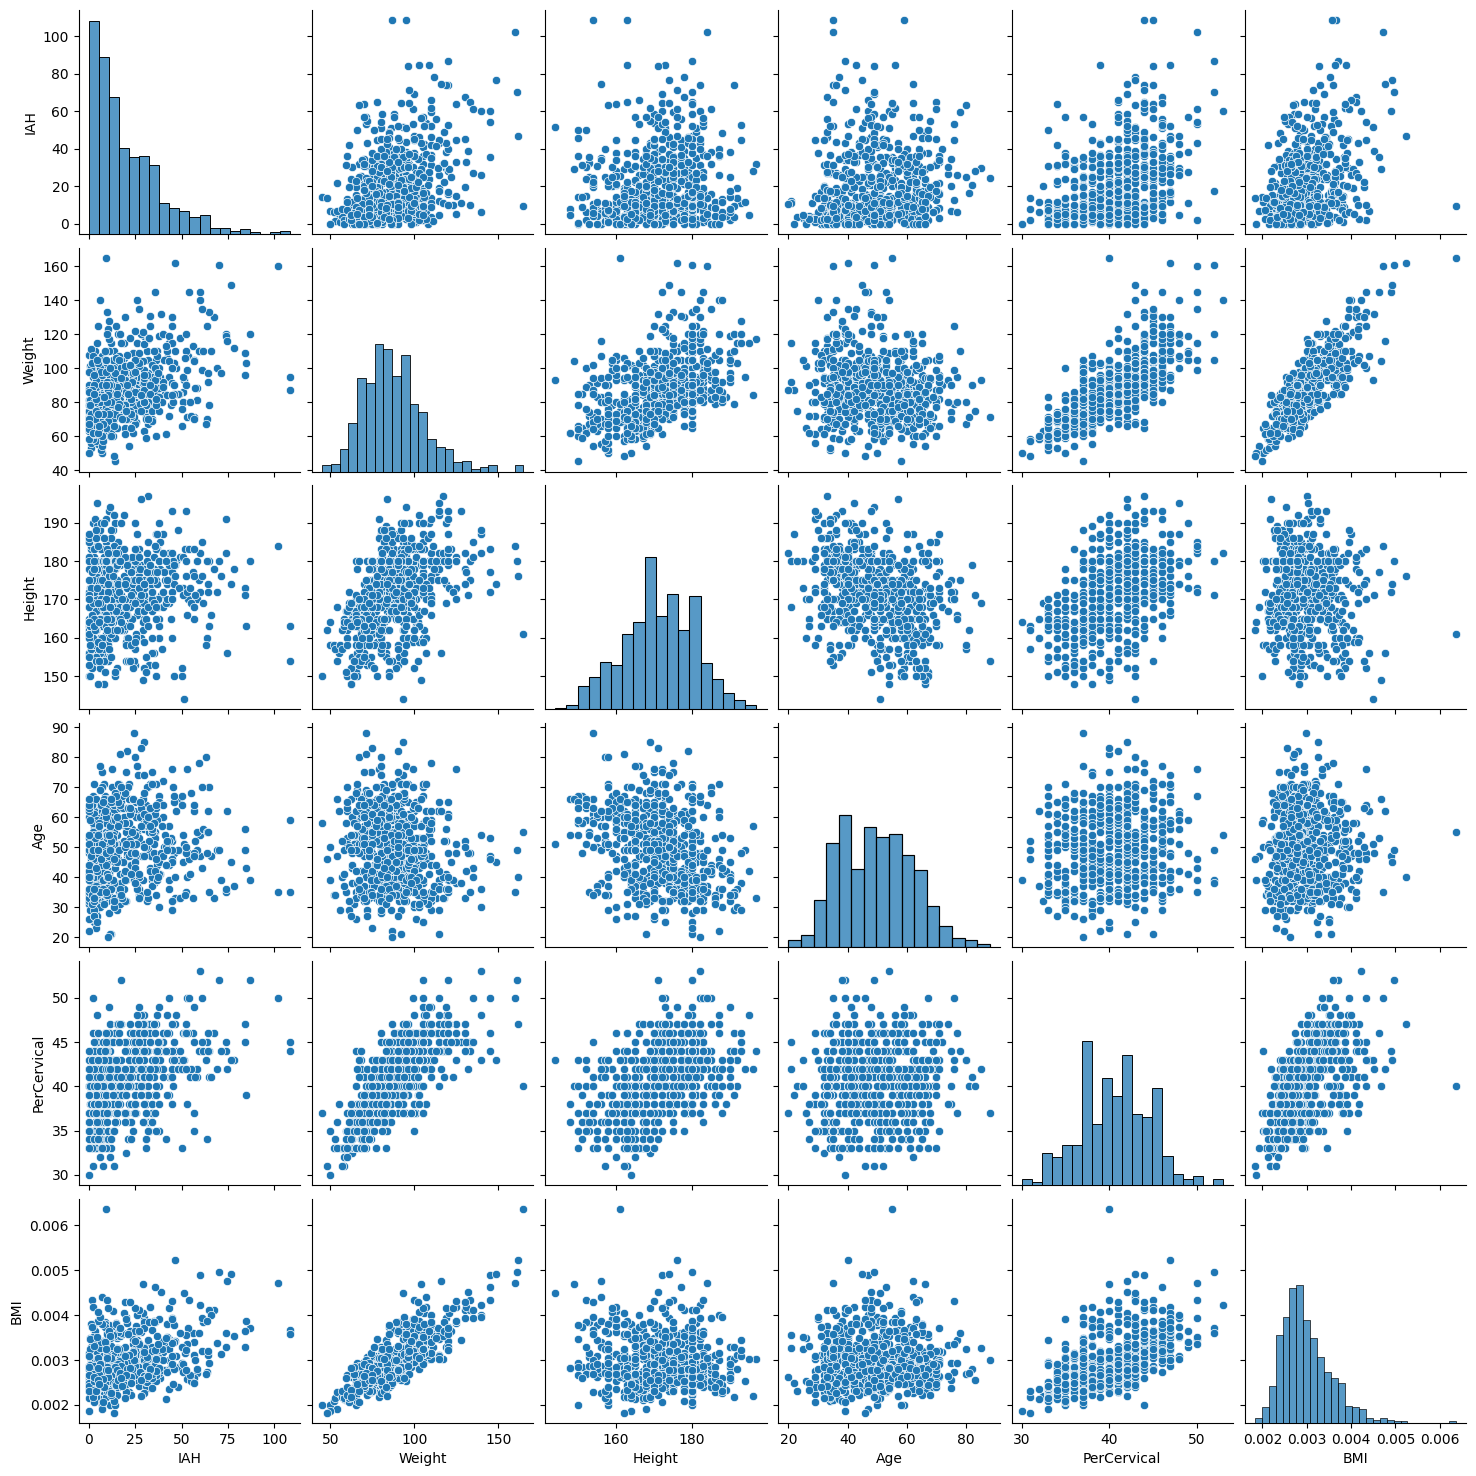

In [ ]:
sns.pairplot(df_tmp)

<ipython-input-110-739cce27675d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_tmp.corr()


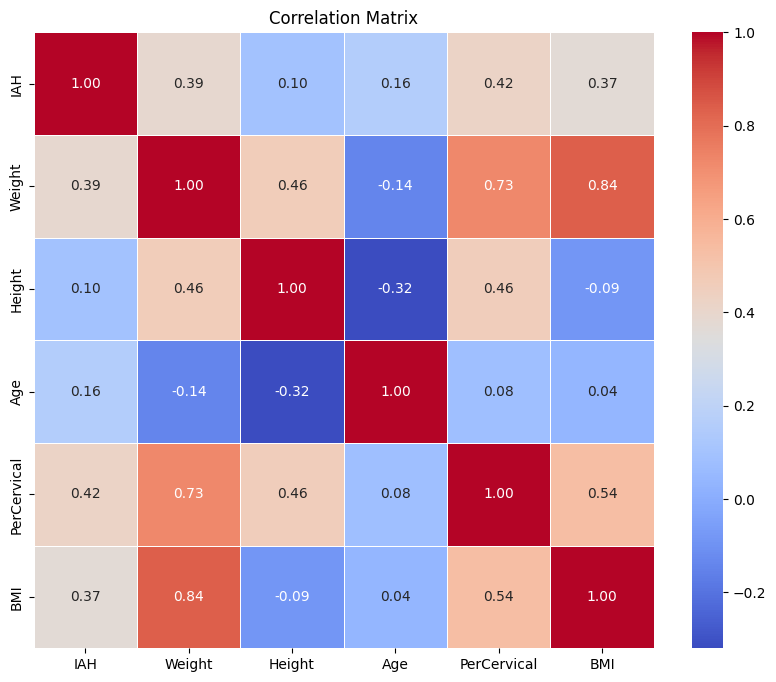

In [ ]:
correlation_matrix = df_tmp.corr()

# Create a heatmap for the graphical representation
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Include the Gender by converting it to numeric

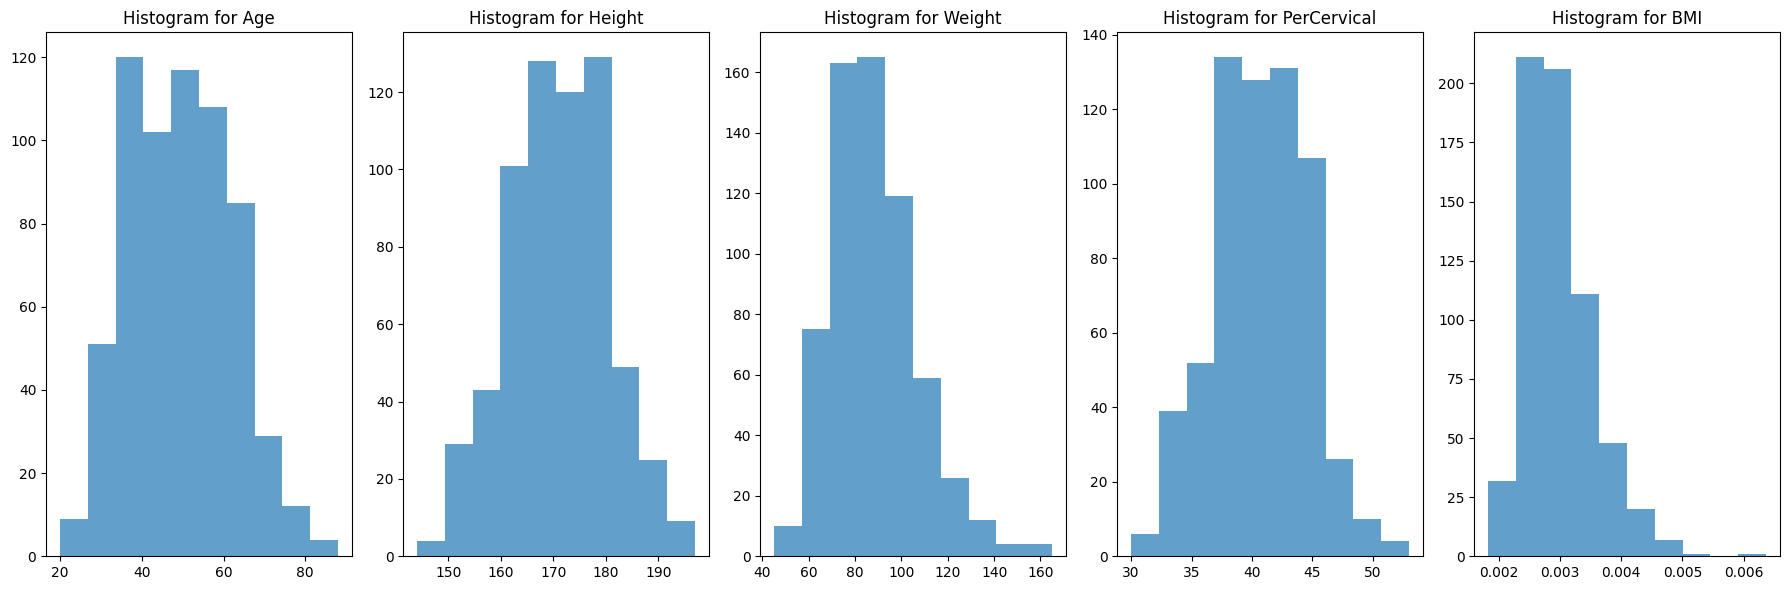

In [ ]:
# Create a single row for histograms
num_cols = len(df_tmp.columns)

fig, axes = plt.subplots(1, 5, figsize = (18, 6))
columns = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']

# Loop through each variable and create histograms
for i, var in enumerate(columns):
    axes[i].hist(df_tmp[var], bins = 10, alpha = 0.7)
    axes[i].set_title(f'Histogram for {var}')

# Adjust layout
plt.tight_layout()
plt.show()

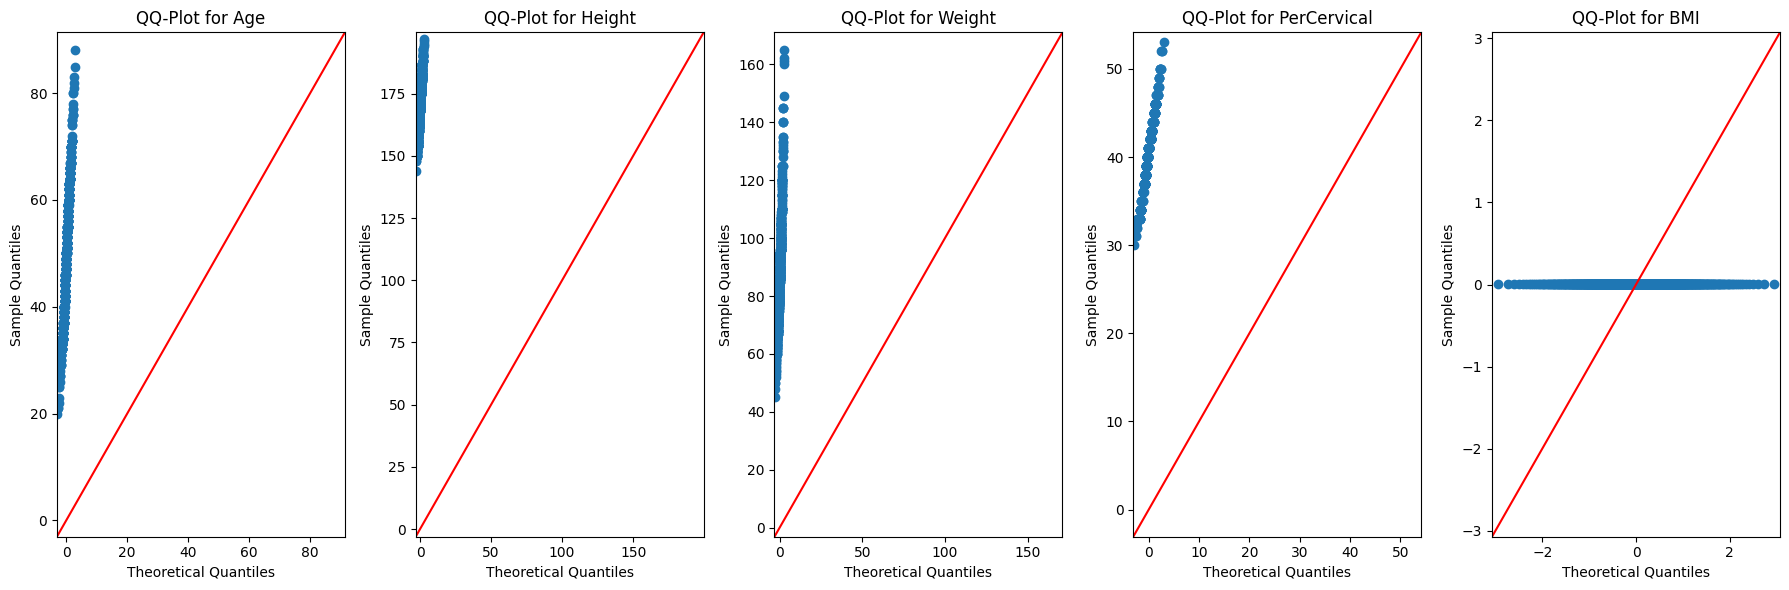

In [ ]:
# Create a grid for QQ-plots
num_cols = len(df_tmp.columns)
num_rows = num_cols

fig, axes = plt.subplots(1, 5, figsize = (18, 6))
columns = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']

# Loop through each variable and create QQ-plots
for i, var in enumerate(columns):
    sm.qqplot(df_tmp[var], line='45', ax = axes[i])
    axes[i].set_title(f'QQ-Plot for {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Define a significance level
alpha = 0.05
features_to_skip = [1, 2, 0]

# Perform the Kolmogorov-Smirnov test for each feature
for feature in df_tmp.columns:
    if df_tmp[feature].dtype not in [int, float]:
        continue

    ks_statistic, p_value = stats.kstest(df_tmp[feature], 'norm')
    is_normal = p_value >= alpha

    print(f"Feature: {feature}")
    print("Kolmogorov-Smirnov Statistic:", ks_statistic)
    print("P-Value:", p_value)
    print("Is Normally Distributed:", is_normal)
    print()
    if is_normal:
        print(f"The feature '{feature}' appears to be normally distributed.")
    else:
        print(f"The feature '{feature}' does not appear to be normally distributed.")
    print()
    print()

Feature: IAH
Kolmogorov-Smirnov Statistic: 0.9003267911287438
P-Value: 0.0
Is Normally Distributed: False

The feature 'IAH' does not appear to be normally distributed.


Feature: Weight
Kolmogorov-Smirnov Statistic: 1.0
P-Value: 0.0
Is Normally Distributed: False

The feature 'Weight' does not appear to be normally distributed.


Feature: Height
Kolmogorov-Smirnov Statistic: 1.0
P-Value: 0.0
Is Normally Distributed: False

The feature 'Height' does not appear to be normally distributed.


Feature: Age
Kolmogorov-Smirnov Statistic: 1.0
P-Value: 0.0
Is Normally Distributed: False

The feature 'Age' does not appear to be normally distributed.


Feature: PerCervical
Kolmogorov-Smirnov Statistic: 1.0
P-Value: 0.0
Is Normally Distributed: False

The feature 'PerCervical' does not appear to be normally distributed.


Feature: BMI
Kolmogorov-Smirnov Statistic: 0.5007296608284916
P-Value: 3.0372072400737606e-148
Is Normally Distributed: False

The feature 'BMI' does not appear to be normally d

In [ ]:
X = sm.add_constant(df_tmp[['BMI', 'PerCervical', 'Age', 'Height', 'Weight']])

# Compute VIF for each independent variable
vif = 1 / (1 - sm.OLS(df_tmp['BMI'], X.drop('BMI', axis=1)).fit().rsquared)
t1 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['PerCervical'], X.drop('PerCervical', axis=1)).fit().rsquared)
t2 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Age'], X.drop('Age', axis=1)).fit().rsquared)
t3 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Height'], X.drop('Height', axis=1)).fit().rsquared)
t4 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Weight'], X.drop('Weight', axis=1)).fit().rsquared)
t5 = 1 / vif

# Compute tolerance for each variable
print(f'Tolerance for BMI: {t1}')
print(f'Tolerance for PerCervical: {t2}')
print(f'Tolerance for Age: {t3}')
print(f'Tolerance for Height: {t4}')
print(f'Tolerance for Weight: {t5}')

Tolerance for BMI: 0.01315718795319365
Tolerance for PerCervical: 0.39842059386423867
Tolerance for Age: 0.7872218032961453
Tolerance for Height: 0.0347286341350449
Tolerance for Weight: 0.010247148246604998


In [ ]:
X = sm.add_constant(df_tmp[['BMI', 'PerCervical', 'Age', 'Weight']])

# Compute VIF for each independent variable
vif = 1 / (1 - sm.OLS(df_tmp['BMI'], X.drop('BMI', axis=1)).fit().rsquared)
t1 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['PerCervical'], X.drop('PerCervical', axis=1)).fit().rsquared)
t2 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Age'], X.drop('Age', axis=1)).fit().rsquared)
t3 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Weight'], X.drop('Weight', axis=1)).fit().rsquared)
t5 = 1 / vif

# Compute tolerance for each variable
print(f'Tolerance for BMI: {t1}')
print(f'Tolerance for PerCervical: {t2}')
print(f'Tolerance for Age: {t3}')
print(f'Tolerance for Weight: {t5}')

Tolerance for BMI: 0.24850414740495871
Tolerance for PerCervical: 0.39902980215215356
Tolerance for Age: 0.7891823165667108
Tolerance for Weight: 0.150509465093966


In [ ]:
X = sm.add_constant(df_tmp[['BMI', 'PerCervical', 'Age', 'Height']])

# Compute VIF for each independent variable
vif = 1 / (1 - sm.OLS(df_tmp['BMI'], X.drop('BMI', axis=1)).fit().rsquared)
t1 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['PerCervical'], X.drop('PerCervical', axis=1)).fit().rsquared)
t2 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Age'], X.drop('Age', axis=1)).fit().rsquared)
t3 = 1 / vif

vif = 1 / (1 - sm.OLS(df_tmp['Height'], X.drop('Height', axis=1)).fit().rsquared)
t4 = 1 / vif

# Compute tolerance for each variable
print(f'Tolerance for BMI: {t1}')
print(f'Tolerance for PerCervical: {t2}')
print(f'Tolerance for Age: {t3}')
print(f'Tolerance for Height: {t4}')

Tolerance for BMI: 0.5481827102694837
Tolerance for PerCervical: 0.4057954658597861
Tolerance for Age: 0.791097518233111
Tolerance for Height: 0.5100919808436881


In [ ]:
X = sm.add_constant(df_tmp[['Weight', 'Height', 'Age', 'PerCervical', 'BMI', 'Gender']])  # Add a constant for the intercept
Y = df_tmp['IAH']

# Fit a linear regression model
model = sm.OLS(Y, X).fit()
residuals = model.resid

from statsmodels.stats.stattools import durbin_watson

# Performing the Durbin-Watson test
dw_statistic = durbin_watson(residuals)

if 1.5 <= dw_statistic <= 2.5:
    print("The Durbin-Watson test suggests no significant autocorrelation.")
    print(f'The d value is : {dw_statistic}')
else:
    print("The Durbin-Watson test suggests the presence of autocorrelation.")
    print(f'The d value is : {dw_statistic}')

The Durbin-Watson test suggests no significant autocorrelation.
The d value is : 1.9614805178563126


In [ ]:
from statsmodels.stats.api import het_goldfeldquandt
test_result = het_goldfeldquandt(residuals, X)
p_value = test_result[1]

if p_value < 0.05:
    print("The Goldfeld-Quandt test suggests evidence of heteroscedasticity.")
else:
    print("The Goldfeld-Quandt test suggests no significant evidence of heteroscedasticity.")

The Goldfeld-Quandt test suggests no significant evidence of heteroscedasticity.


In [ ]:
# Fit the linear regression model
X = sm.add_constant(df_tmp[['BMI', 'Gender', 'Height', 'Age', 'PerCervical']])
model1 = sm.OLS(df_tmp['IAH'], X).fit()

# Printing the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    IAH   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     36.11
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.49e-32
Time:                        21:25:39   Log-Likelihood:                -2685.2
No. Observations:                 637   AIC:                             5382.
Df Residuals:                     631   BIC:                             5409.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -71.5678     19.675     -3.637      

In [ ]:
df_tmp_men = df_tmp.groupby('Gender').get_group(0)
df_tmp_women = df_tmp.groupby('Gender').get_group(1)

df_tmp_men = df_tmp.groupby('Gender').get_group(0)
df_tmp_women = df_tmp.groupby('Gender').get_group(1)

In [ ]:
# Fit the linear regression model
X = sm.add_constant(df_tmp_men[['BMI', 'Age', 'PerCervical']])

# Printing the summary of the model
print(model_men.summary())

                            OLS Regression Results                            
Dep. Variable:                    IAH   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     43.30
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.32e-24
Time:                        21:25:39   Log-Likelihood:                -1912.0
No. Observations:                 455   AIC:                             3832.
Df Residuals:                     451   BIC:                             3848.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -61.0115     10.929     -5.583      

In [ ]:
# Fit the linear regression model
X = sm.add_constant(df_tmp_women[['BMI', 'Age', 'PerCervical']])
model_women = sm.OLS( df_tmp_women['IAH'], X).fit()

# Print the summary
print(model_women.summary())

                            OLS Regression Results                            
Dep. Variable:                    IAH   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.56
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.81e-07
Time:                        21:25:39   Log-Likelihood:                -768.85
No. Observations:                 182   AIC:                             1546.
Df Residuals:                     178   BIC:                             1559.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -65.3857     16.946     -3.859      

In [ ]:
# Fit the linear regression model
X = sm.add_constant(df_tmp[['BMI', 'Age', 'PerCervical']])
model2 = sm.OLS(df_tmp['IAH'], X).fit()

# Print the summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IAH   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     60.20
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           2.99e-34
Time:                        21:25:39   Log-Likelihood:                -2685.4
No. Observations:                 637   AIC:                             5379.
Df Residuals:                     633   BIC:                             5397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -66.6908      7.036     -9.478      